In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler

# Electricity Production data

## Import data

In [2]:
df = pd.read_csv('data/Electric_Production.csv')
data = np.array(df['value'])
dataset = np.reshape(data,(-1,1)).astype('float32')
len(dataset)

397

## Data preprocessing

In [3]:
#Create dataset from raw data
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
	    a = dataset[i:(i+look_back), 0]
	    dataX.append(a)
	    dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
#Data point from test_index_from is the starting index of the testing set
window_size = 15
test_index_from = int(len(dataset) * 0.75)
train, test = dataset[0:test_index_from,:], dataset[test_index_from - window_size : len(dataset),:]
trainX, trainY = create_dataset(train, window_size)
testX, testY = create_dataset(test, window_size)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("train_data_size: " + str(trainX.shape[0]), " test_data_size: " + str(testX.shape[0]))

train_data_size: 282  test_data_size: 100


# Train Model

In [5]:
gru = Sequential()
gru.add(GRU(40, input_dim=window_size, activation="relu"))
gru.add(Dense(1))
gru.compile(loss='mean_absolute_error', optimizer='adam')

gru.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
7/7 - 2s - loss: 73.6711 - val_loss: 48.1578 - 2s/epoch - 236ms/step
Epoch 2/200
7/7 - 0s - loss: 23.2087 - val_loss: 5.4937 - 51ms/epoch - 7ms/step
Epoch 3/200
7/7 - 0s - loss: 8.1749 - val_loss: 14.9429 - 40ms/epoch - 6ms/step
Epoch 4/200
7/7 - 0s - loss: 8.1104 - val_loss: 5.2760 - 34ms/epoch - 5ms/step
Epoch 5/200
7/7 - 0s - loss: 5.7908 - val_loss: 6.0698 - 49ms/epoch - 7ms/step
Epoch 6/200
7/7 - 0s - loss: 4.8641 - val_loss: 7.0728 - 45ms/epoch - 6ms/step
Epoch 7/200
7/7 - 0s - loss: 4.9457 - val_loss: 5.1601 - 41ms/epoch - 6ms/step
Epoch 8/200
7/7 - 0s - loss: 4.9445 - val_loss: 5.3943 - 43ms/epoch - 6ms/step
Epoch 9/200
7/7 - 0s - loss: 4.3703 - val_loss: 6.2764 - 42ms/epoch - 6ms/step
Epoch 10/200
7/7 - 0s - loss: 4.5598 - val_loss: 4.9942 - 47ms/epoch - 7ms/step
Epoch 11/200
7/7 - 0s - loss: 4.3077 - val_loss: 4.9364 - 58ms/epoch - 8ms/step
Epoch 12/200
7/7 - 0s - loss: 3.9889 - val_loss: 5.3575 - 59ms/epoch - 8ms/step
Epoch 13/200
7/7 - 0s - loss: 4.2492 - val_lo

Epoch 104/200
7/7 - 0s - loss: 2.2434 - val_loss: 2.9914 - 45ms/epoch - 6ms/step
Epoch 105/200
7/7 - 0s - loss: 2.5132 - val_loss: 3.6831 - 39ms/epoch - 6ms/step
Epoch 106/200
7/7 - 0s - loss: 2.1497 - val_loss: 2.7284 - 35ms/epoch - 5ms/step
Epoch 107/200
7/7 - 0s - loss: 2.1693 - val_loss: 2.9295 - 35ms/epoch - 5ms/step
Epoch 108/200
7/7 - 0s - loss: 2.1686 - val_loss: 3.4537 - 37ms/epoch - 5ms/step
Epoch 109/200
7/7 - 0s - loss: 2.3057 - val_loss: 2.8599 - 59ms/epoch - 8ms/step
Epoch 110/200
7/7 - 0s - loss: 2.3440 - val_loss: 3.3377 - 43ms/epoch - 6ms/step
Epoch 111/200
7/7 - 0s - loss: 2.9934 - val_loss: 4.7990 - 31ms/epoch - 4ms/step
Epoch 112/200
7/7 - 0s - loss: 2.5996 - val_loss: 2.8359 - 31ms/epoch - 4ms/step
Epoch 113/200
7/7 - 0s - loss: 2.1337 - val_loss: 2.8494 - 44ms/epoch - 6ms/step
Epoch 114/200
7/7 - 0s - loss: 2.1420 - val_loss: 2.8248 - 31ms/epoch - 4ms/step
Epoch 115/200
7/7 - 0s - loss: 2.2095 - val_loss: 3.0041 - 40ms/epoch - 6ms/step
Epoch 116/200
7/7 - 0s - los

# Make prediction

In [6]:
gru_predict = gru.predict(testX)
np.savetxt("output/Elec_GRU.csv", gru_predict, delimiter="\n") 

4/4 [==============================] - 0s 3ms/step


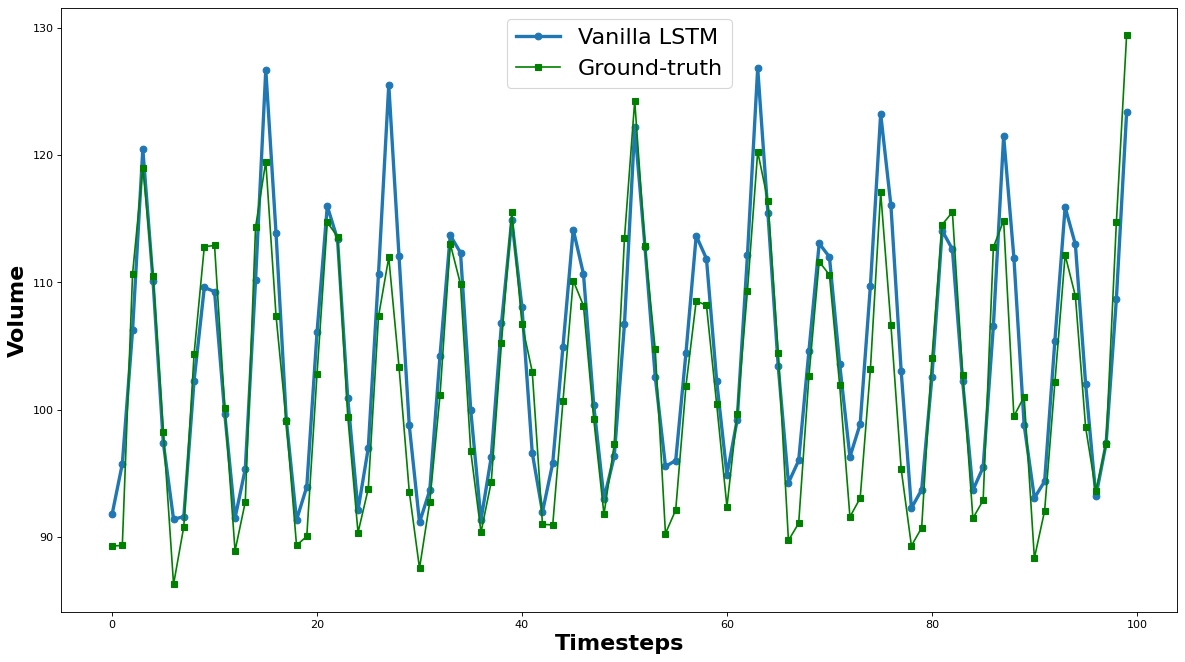

In [7]:
timesteps = 100
plt.figure(figsize=(18, 10), dpi=80)
plt.plot(gru_predict[0:timesteps], label = "Vanilla LSTM", marker='o', linewidth=3)
plt.plot(testY[0:timesteps], label = "Ground-truth", marker='s', color = 'g')
plt.xlabel('Timesteps', fontweight='bold', fontsize=20)
plt.ylabel('Volume', fontweight='bold', fontsize = 20)
plt.legend(fontsize=20)
plt.show()

# Stock Volume

In [8]:
df = pd.read_csv('data/Microsoft_Stock.csv')
data = np.array(df['Volume'])
dataset = np.reshape(data,(-1,1)).astype('float32')
len(dataset)

1511

In [9]:
#Data point from test_index_from is the starting index of the testing set
window_size = 40
test_index_from = int(len(dataset) * 0.75)
train, test = dataset[0:test_index_from,:], dataset[test_index_from - window_size : len(dataset),:]
trainX, trainY = create_dataset(train, window_size)
testX, testY = create_dataset(test, window_size)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("train_data_size: " + str(trainX.shape[0]), " test_data_size: " + str(testX.shape[0]))

train_data_size: 1093  test_data_size: 378


In [ ]:
gru = Sequential()
gru.add(GRU(80, input_dim=window_size, activation="relu"))
gru.add(Dense(1))
gru.compile(loss='mean_absolute_error', optimizer='adam')

gru.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
24/24 - 1s - loss: 10633009.0000 - val_loss: 9005684.0000 - 1s/epoch - 59ms/step
Epoch 2/200
24/24 - 0s - loss: 8230105.5000 - val_loss: 7223820.5000 - 86ms/epoch - 4ms/step
Epoch 3/200
24/24 - 0s - loss: 7647467.5000 - val_loss: 6997541.5000 - 78ms/epoch - 3ms/step
Epoch 4/200
24/24 - 0s - loss: 7303452.5000 - val_loss: 6858678.0000 - 73ms/epoch - 3ms/step
Epoch 5/200
24/24 - 0s - loss: 7062329.0000 - val_loss: 6654635.0000 - 76ms/epoch - 3ms/step
Epoch 6/200
24/24 - 0s - loss: 6867128.0000 - val_loss: 6589079.5000 - 76ms/epoch - 3ms/step
Epoch 7/200
24/24 - 0s - loss: 6747227.0000 - val_loss: 6560186.0000 - 76ms/epoch - 3ms/step
Epoch 8/200
24/24 - 0s - loss: 6758384.0000 - val_loss: 6562817.5000 - 76ms/epoch - 3ms/step
Epoch 9/200
24/24 - 0s - loss: 6614053.0000 - val_loss: 6512576.0000 - 75ms/epoch - 3ms/step
Epoch 10/200
24/24 - 0s - loss: 6505899.0000 - val_loss: 6464575.0000 - 74ms/epoch - 3ms/step
Epoch 11/200
24/24 - 0s - loss: 6380838.5000 - val_loss: 6509245.5000

In [ ]:
gru_predict = gru.predict(testX)
np.savetxt("output/Stock_volume_GRU.csv", gru_predict, delimiter="\n") 

# Stock Close Price

In [ ]:
data = np.array(df['Close'])
dataset = np.reshape(data,(-1,1)).astype('float32')
len(dataset)

In [ ]:
#Data point from test_index_from is the starting index of the testing set
window_size = 40
test_index_from = int(len(dataset) * 0.75)
train, test = dataset[0:test_index_from,:], dataset[test_index_from - window_size : len(dataset),:]
trainX, trainY = create_dataset(train, window_size)
testX, testY = create_dataset(test, window_size)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("train_data_size: " + str(trainX.shape[0]), " test_data_size: " + str(testX.shape[0]))

In [ ]:
gru = Sequential()
gru.add(GRU(80, input_dim=window_size, activation="relu"))
gru.add(Dense(1))
gru.compile(loss='mean_absolute_error', optimizer='adam')

gru.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

In [ ]:
gru_predict = gru.predict(testX)
np.savetxt("output/Stock_close_GRU.csv", gru_predict, delimiter="\n") 

In [ ]:
timesteps = 100
plt.figure(figsize=(18, 10), dpi=80)
plt.plot(gru_predict[0:timesteps], label = "Vanilla LSTM", marker='o', linewidth=3)
plt.plot(testY[0:timesteps], label = "Ground-truth", marker='s', color = 'g')
plt.xlabel('Timesteps', fontweight='bold', fontsize=20)
plt.ylabel('Volume', fontweight='bold', fontsize = 20)
plt.legend(fontsize=20)
plt.show()